


#***SUPERMARKET SALES ANALYSIS AND PREDICTIVE MODEL***




#***Write a Problem Statement***


The project aims to

*   create a predictive model
*   the model takes values for select product,
*and predicts the Quantity Value



**About Dataset**
**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset. In this very analysis, I chose to work with the first sheet which is ‘’Supermarket Sales SHEET 1’’


**Objective:**

This data science project is a **personal project** designed  with the aim of  building a **multiple  regression model** that accurately forecasts Quantity based on key factors such as "Unit price", Rating","Total.


**Source**

The data was obtained from Kaggle website, the dataset contains sales information for various product in the supermarket.


#**Attribute information**

**Invoice id**: Computer generated sales slip invoice identification number

**Branch**: Branch of supercenter (3 branches are available identified by A, B and C).

**City**: Location of supercenters

**Customer type**: Type of customers, recorded by Members for customers using member card and Normal for without member card.

**Gender**: Gender type of customer

**Product line**: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

**Unit price**: Price of each product in $

**Quantity**: Number of products purchased by customer

**Tax:** 5% tax fee for customer buying

**Total**: Total price including tax

**Date**: Date of purchase (Record available from January 2019 to March 2019)

**Time:** Purchase time (10am to 9pm)

**Payment**: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

**COGS:** Cost of goods sold

**Gross margin percentage**: Gross margin percentage

**Gross income**: Gross income

**Rating**: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)





In [444]:

# import Statements

import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import pickle
from google.colab import files


import warnings
warnings.filterwarnings('ignore')


In [445]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [446]:
# Importing the relevant Dataset

df = pd.read_csv("/content/supermarket_sales - Sheet1.csv")

#***EXAMINING THE DATASET***

In [447]:
#Examing the Dataset using head(), tail(), df, df.describe() and df.info()

In [448]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [449]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [450]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [451]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  


#***Taking out irregularities***

In [453]:
#The entire Dataset comprises 1000 rows and 17 columns with no null value

In [454]:

#Checking for null values
# The code returns true if the row is null  or returns false

In [455]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [456]:
#There's no values missing in this case

#***Exploratory Data Analysis***

In [457]:
df["Quantity"]

,Quantity
0,7
1,5
2,7
3,8
4,7
...,...
995,1
996,10
997,1
998,1



#***Summary Statistics***

In [458]:
df["Quantity"].describe()

,Quantity
count,1000.000000
mean,5.510000
std,2.923431
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,10.000000


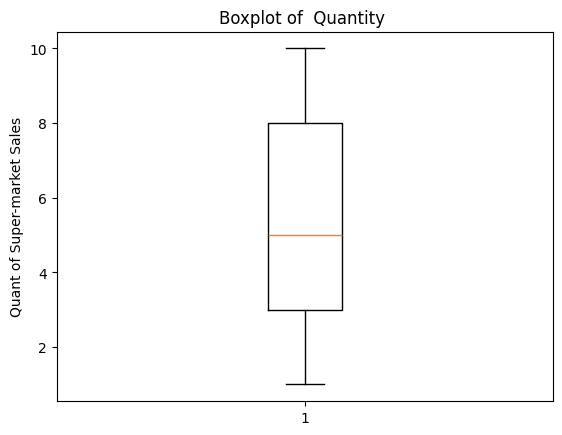

In [459]:
# box plot of the "quantity" column

plt.boxplot(df["Quantity"])
plt.title("Boxplot of  Quantity ")
plt.ylabel("Quant of Super-market Sales")
plt.show()

Finding columns to select a good fit for feature matrix columns

A correlation heatmap is used in this kind of situation.

In [460]:
# correlation heatmap of numerical columns in the dataset

df[["Quantity","Unit price","Rating","Total"]].corr()

,Quantity,Unit price,Rating,Total
Quantity,1.000000,0.010778,-0.015815,0.705510
Unit price,0.010778,1.000000,-0.008778,0.633962
Rating,-0.015815,-0.008778,1.000000,-0.036442
Total,0.705510,0.633962,-0.036442,1.000000


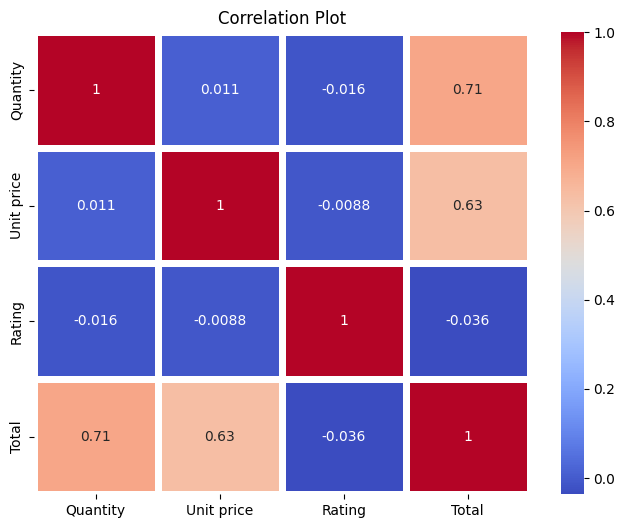

In [461]:

corr = df[["Quantity", "Unit price", "Rating", "Total"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=5)
plt.title("Correlation Plot")
plt.show()

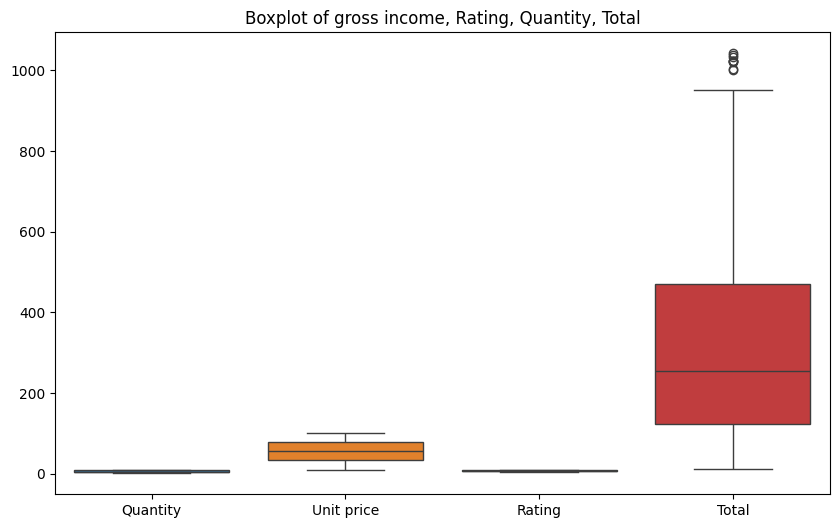

In [462]:
# prompt: boxplot of quantity","Unit price","Rating","Total"

# Boxplot of specified columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["Quantity","Unit price","Rating","Total"]])
plt.title("Boxplot of gross income, Rating, Quantity, Total")
plt.show()

Dealing with Outliers

In [463]:
for column in df[["Quantity","Unit price","Rating","Total"]]:

  # STEP 1: calculate 25th and 75th percentiles
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  print(Q1, Q3)

  # STEP 2: calculate InterQuartile Range
  IQR = Q3 - Q1

  # STEP 3: calculate upper and lower bounds
  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR

  # STEP 4: Floor outliers (replace outlier values with upper_bound and low_bound values)
  # flooring outliers above upper bound
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

  # flooring outliers below lower bound
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

3.0 8.0
32.875 77.935
5.5 8.5
124.422375 471.35024999999996


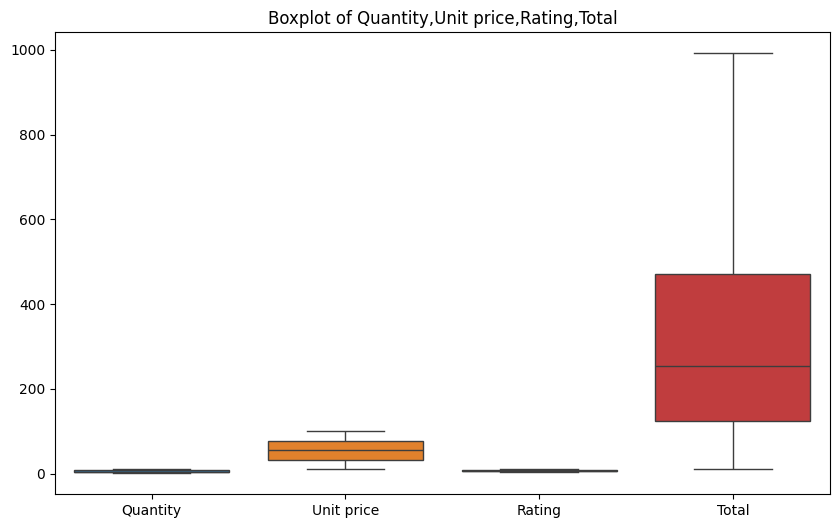

In [464]:
 #checking  if outliers have been taken out

# Boxplot of specified columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["Quantity","Unit price","Rating","Total"]])
plt.title("Boxplot of Quantity,Unit price,Rating,Total")
plt.show()

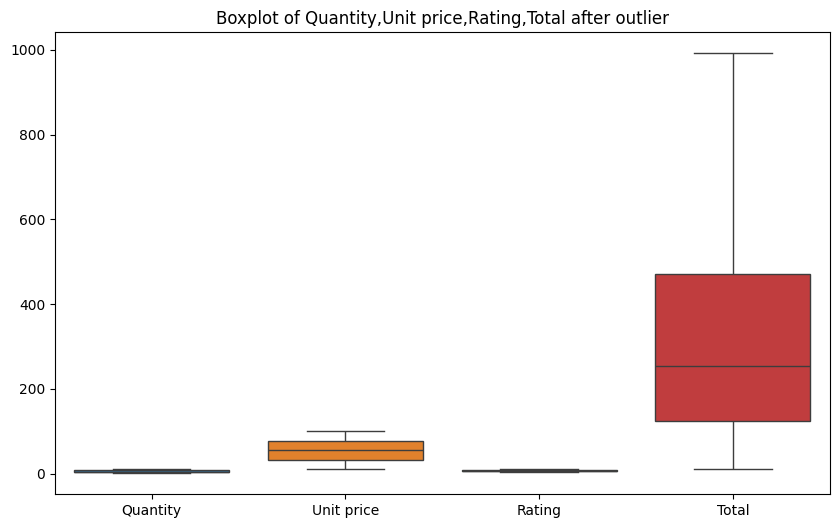

In [465]:
# Boxplot of the variables chosen

import matplotlib.pyplot as plt
# Boxplot of specified columns after outlier handling
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["Quantity","Unit price","Rating","Total"]])
plt.title("Boxplot of Quantity,Unit price,Rating,Total after outlier")

plt.show()


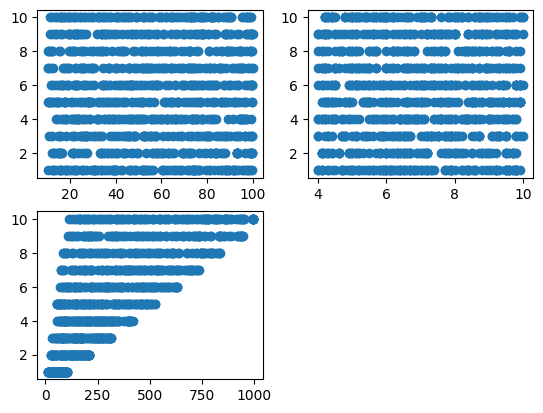

In [466]:
#plotting a scatterplot of "Unit price", "Rating","Total"
Quant_modelmodel = ["Unit price","Rating","Total"]
X = df[Quant_model]
y = df["Quantity"]


plt.subplot(2,2,1)
plt.scatter(X["Unit price"],y)
plt.subplot(2,2,2)
plt.scatter(X["Rating"],y)
plt.subplot(2,2,3)
plt.scatter(X["Total"],y)
plt.show()

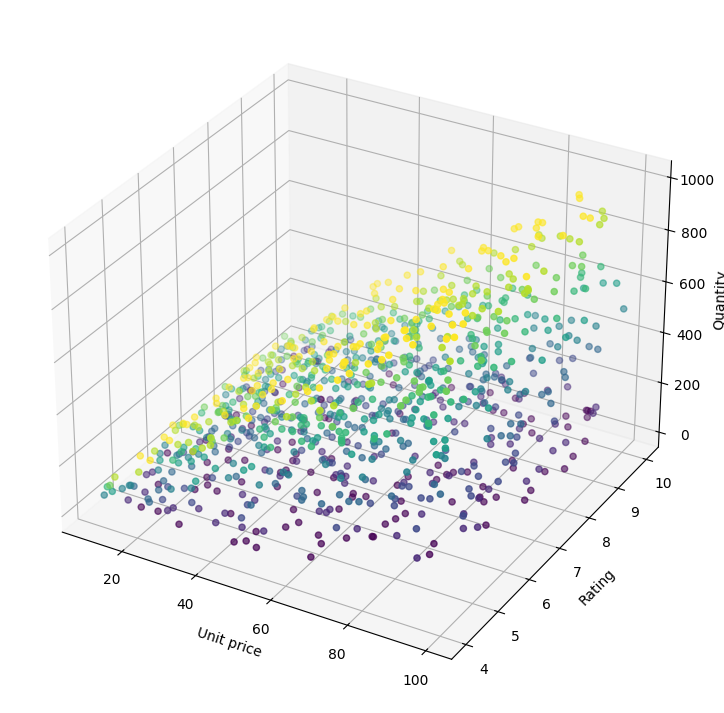

In [467]:
fig = plt.figure(10, figsize=(9, 9))

ax = fig.add_subplot(111, projection='3d')
X1 = df["Unit price"]
X2 = df["Rating"]
X3 = df["Total"]
y = df["Quantity"]

ax.scatter(X1, X2, X3, c=y, cmap='viridis')
ax.set_xlabel("Unit price")
ax.set_ylabel('Rating')
ax.set_zlabel("Quantity")
plt.show()

#**Handling outliers**

#***Decide on Most Appropriate Machine Learning Model***

A Multi-linear regression model will be used since we are using multiple columns for the feature matrix

#***Train & Test Model***

In [468]:
# trimming the data to relevant columns

model_df = df[["Quantity","Unit price","Rating","Total"]]
model_df

,Quantity,Unit price,Rating,Total
0,7.0,74.69,9.1,548.971500
1,5.0,15.28,9.6,80.220000
2,7.0,46.33,7.4,340.525500
3,8.0,58.22,8.4,489.048000
4,7.0,86.31,5.3,634.378500
...,...,...,...,...
995,1.0,40.35,6.2,42.367500
996,10.0,97.38,4.4,991.742062
997,1.0,31.84,7.7,33.432000
998,1.0,65.82,4.1,69.111000


In [469]:
# divide data into feature matrix and target vector

feature = ["Unit price","Rating","Total"] # square brackets, since its a matrix
target = "Quantity"

X = model_df[feature] # model_df[["Rating","Quantity","Total"]]
y = model_df[target]

In [470]:
# dividing data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#***Creating Model and evaluate its Performance***

In [471]:
# Creating a baseline model

baseline_model = y_train.mean()

baseline_model

5.50125

In [472]:
#creating predictions using the baseline model

# baseline_pred =

baseline_pred = [baseline_model] * len(y_test)

baseline_pred

[5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,
 5.50125,


#***Evaluate Baseline Performance***
MAE [Mean Absolute Error] evaluation metric will be used.

In [473]:
# MAE for baseline model

baseline_mae = mean_absolute_error(y_test, baseline_pred)

print("The mean value of y_train values is:", round(baseline_model, 2))
print("The baseline MAE is:", round(baseline_mae, 2))

The mean value of y_train values is: 5.5
The baseline MAE is: 2.38



*   Build and Evaluate Model

*   Create a MultiLinear Regression Model


In [474]:
# let's create a multilinear regression model

model = LinearRegression()
model

LinearRegression()

In [475]:
# to fit a model means to train it using the X_train and y_train values

model.fit(X_train, y_train)

LinearRegression()

***Test Model With Training Data***

In [476]:
# generating predictions using X_train

model_train_pred = model.predict(X_train)

model_train_pred

array([ 6.81668456,  5.89969646,  4.85139667, 11.3759262 ,  5.18357784,
        3.66827666,  7.04052875,  3.02059535,  8.26602847,  6.76138305,
        6.53238594, 11.5641882 ,  5.27821839,  4.0394854 ,  4.89752957,
        4.36978643,  0.42265462,  7.0378799 ,  4.88499663,  6.16381971,
        7.02222271,  1.92138651,  2.93200629, 11.0349803 ,  6.792563  ,
        6.5542849 ,  0.85044273, 11.38223929,  2.46355067,  0.52709921,
        3.83824897,  1.42333163,  7.66981688,  7.28973371,  0.45128672,
        9.4656225 ,  5.18277553,  1.92267825, 10.12408286,  4.33184259,
        7.71021055,  5.33236019,  6.84702821,  4.94952326,  6.49276074,
       11.03435297,  1.93594967,  6.50827814,  5.13920397,  0.53030169,
        6.214502  , 10.57145975,  6.90834624,  5.94957886,  5.86115878,
        5.04629166,  4.89058945,  2.74157342,  4.79911534,  7.30667699,
        3.3713678 ,  9.14390626,  5.51294269,  4.72562479, 11.64979253,
        4.52843476, -0.56661861,  3.70246713,  2.56502428,  4.04

#***Evaluate Model Performance 1***

In [477]:
# Calculate model MAE for training data

model_train_mae = mean_absolute_error(y_train, model_train_pred)

round(model_train_mae, 3)


0.93

In [478]:
# print baseline and model (train) mae to compare both

print("The baseline |MAE is:\t\t", round(baseline_mae, 3))
print("The model (train) MAE is:\t", round(model_train_mae, 3))


The baseline |MAE is:		 2.375
The model (train) MAE is:	 0.93


***Test Model With Testing Data***

In [479]:
# model generates predictions off X_test values

model_test_pred = model.predict(X_test)

model_test_pred

array([ 6.13504862,  9.48658013,  6.79564269,  4.00347629,  4.3820334 ,
        9.46929093,  2.42114313,  7.73548193,  7.91083943,  5.38142756,
        8.12528209,  8.10324776,  6.12419387,  2.49947   ,  2.01479042,
        7.24761768,  8.07632987,  5.7861495 , 10.21484485,  4.58403225,
        6.01026155,  6.30417745,  2.29021417,  2.4070184 ,  6.83601731,
        0.59629502,  9.5801166 ,  4.66403024,  5.21795322,  1.86090382,
        0.73736782,  8.2629573 , -0.48870908,  7.50321407,  6.19441485,
        4.63459437,  9.64912581,  3.18299265,  4.43208675,  5.81817242,
        4.28067554, 11.28987457,  5.3256232 ,  1.09573711, -0.35871952,
        3.37453568,  5.75875623,  1.1077917 ,  7.00742672,  5.7808665 ,
        4.92451044,  6.01750698,  5.10581005,  4.11112474,  5.35624105,
        4.74099951,  4.77425444,  5.11311124,  6.83542759,  4.33121345,
        4.85659337,  4.66459353,  5.00284428, 10.65022728,  6.5806319 ,
        8.80730986,  5.9104291 ,  8.83758005, 11.54630269,  5.60

#***Evalute Model Performance II***

In [480]:
# Calculate model MAE for test data

model_test_mae = mean_absolute_error(y_test, model_test_pred)

round(model_test_mae, 3)

0.828

***Compare Baseline MAE, Model testing MAE and Model training MAE***

In [481]:
# print baseline model (train) and model (test) MAEs to compare the three of them


print("The baseline MAE is:\t\t", round(baseline_mae, 3))
print("The model (train) MAE is:\t", round(model_train_mae, 3))
print("The model (test) MAE is:\t", round(model_test_mae, 3))

The baseline MAE is:		 2.375
The model (train) MAE is:	 0.93
The model (test) MAE is:	 0.828


#***Report Model Performance***

#***Model Deployment***

In [482]:
with open("model.pkl", "wb") as f:
  pickle.dump(model, f)

In [483]:
# check if model.pkl was created

!ls

 app.py   drive   model.pkl   requirements.txt	 sample_data  'supermarket_sales - Sheet1.csv'


***save file containing Streamlit code to local drive***

In [484]:
#Saving model.pkl to local drive

files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [485]:
# streamlit code

%%writefile app.py

import pickle
import streamlit as st
import pandas as pd

# load the file that contains the model (model.pkl)
with open("model.pkl", "rb") as f:
  model = pickle.load(f)

# Streamlit app page a title
st.title("Supermarket Quantity Value Predictor" )

# input widget for getting user values for X (feature matrix value)
Unit = st.slider("Unit price", min_value=0, max_value=100, value=20)
Rating = st.slider("Rating", min_value=0, max_value=100, value=20)
total = st.slider("Total", min_value=0, max_value=100, value=20)

# After selesting quantity, the user then submits the price value
if st.button("Predict"):
  # take the rating value, and format the value the right way
  prediction = model.predict([[Unit price, Rating,	Total]])[0].round(2)
  st.write("The predicted supermarket Quantity is", prediction,)

Overwriting app.py


In [486]:
# check if app.py has been created on google drive

!ls

 app.py   drive   model.pkl   requirements.txt	 sample_data  'supermarket_sales - Sheet1.csv'


Requirements file

This file should contain a list of libraries imported and used in the app.py script. This helps the Streamlit engine to download the libraries so they can be used in the application.

In [487]:
# creating the requirements.txt file

%%writefile requirements.txt
pickle4
streamlit
pandas
scikit-learn

Overwriting requirements.txt


In [488]:
# download the requirements.txt

files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>